<a href="https://colab.research.google.com/github/yewonlee5/auto_parts_image_classifier/blob/main/auto_parts_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Images (pth.gz files)

In [2]:
import gzip
import torch
import glob
import os

In [4]:
# Define the directory
input_dir = '/content/drive/My Drive/IMAGE/'

# Define the pattern
pattern = os.path.join(input_dir, "train_tensor_*.pth.gz")

# Get the list of all matching .pth.gz files
gz_files = glob.glob(pattern)

# Sort the file paths based on the filenames
gz_files.sort()

# Initialize an empty list to store the tensors
train_tensor_X_list = []
train_tensor_y_list = []

# Iterate through each .pth.gz file and load the tensors
for gz_file_path in gz_files:
    print(f"Loading tensor from {gz_file_path}...")

    with gzip.open(gz_file_path, 'rb') as f_in:
        # Load the tensor
        loaded_data = torch.load(f_in, weights_only=True)

    # Access the tensors
    train_tensor_X_list.append(loaded_data['images'])
    train_tensor_y_list.append(loaded_data['labels'])

Loading tensor from /content/drive/My Drive/IMAGE/train_tensor_1.pth.gz...
Loading tensor from /content/drive/My Drive/IMAGE/train_tensor_2.pth.gz...
Loading tensor from /content/drive/My Drive/IMAGE/train_tensor_3.pth.gz...
Loading tensor from /content/drive/My Drive/IMAGE/train_tensor_4.pth.gz...
Loading tensor from /content/drive/My Drive/IMAGE/train_tensor_5.pth.gz...
Loading tensor from /content/drive/My Drive/IMAGE/train_tensor_6.pth.gz...
Loading tensor from /content/drive/My Drive/IMAGE/train_tensor_7.pth.gz...


In [7]:
# Combine the tensors into a single tensor
train_tensor_X = torch.cat(train_tensor_X_list, dim=0)
train_tensor_y = torch.cat(train_tensor_y_list, dim=0)

print(train_tensor_X.shape)
print(train_tensor_y.shape)

torch.Size([6917, 3, 224, 224])
torch.Size([6917])


In [5]:
validate_tensor = torch.load('/content/drive/My Drive/IMAGE/validate_tensor.pth', weights_only=True)
validate_tensor_X = validate_tensor['images']
validate_tensor_y = validate_tensor['labels']

print(validate_tensor_X.shape)
print(validate_tensor_X.shape)

torch.Size([200, 3, 224, 224])
torch.Size([200, 3, 224, 224])


In [6]:
test_tensor = torch.load('/content/drive/My Drive/IMAGE/test_tensor.pth', weights_only=True)
test_tensor_X = test_tensor['images']
test_tensor_y = test_tensor['labels']

print(test_tensor_X.shape)
print(test_tensor_y.shape)

torch.Size([200, 3, 224, 224])
torch.Size([200])


In [8]:
label_dict = \
  {0: 'AIR COMPRESSOR',
  1: 'ALTERNATOR',
  2: 'BATTERY',
  3: 'BRAKE CALIPER',
  4: 'BRAKE PAD',
  5: 'BRAKE ROTOR',
  6: 'CAMSHAFT',
  7: 'CARBERATOR',
  8: 'COIL SPRING',
  9: 'CRANKSHAFT',
  10: 'CYLINDER HEAD',
  11: 'DISTRIBUTOR',
  12: 'ENGINE BLOCK',
  13: 'FUEL INJECTOR',
  14: 'FUSE BOX',
  15: 'GAS CAP',
  16: 'HEADLIGHTS',
  17: 'IDLER ARM',
  18: 'IGNITION COIL',
  19: 'LEAF SPRING',
  20: 'LOWER CONTROL ARM',
  21: 'MUFFLER',
  22: 'OIL FILTER',
  23: 'OIL PAN',
  24: 'OVERFLOW TANK',
  25: 'OXYGEN SENSOR',
  26: 'PISTON',
  27: 'RADIATOR',
  28: 'RADIATOR FAN',
  29: 'RADIATOR HOSE',
  30: 'RIM',
  31: 'SPARK PLUG',
  32: 'STARTER',
  33: 'TAILLIGHTS',
  34: 'THERMOSTAT',
  35: 'TORQUE CONVERTER',
  36: 'TRANSMISSION',
  37: 'VACUUM BRAKE BOOSTER',
  38: 'VALVE LIFTER',
  39: 'WATER PUMP'}

### EDA (Exploratory Data Analysis)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set_style(style = 'whitegrid')

In [ ]:
label_list = [label_dict[index] for index in train_tensor_y.tolist()]

In [ ]:
label_series = pd.Series(label_list)

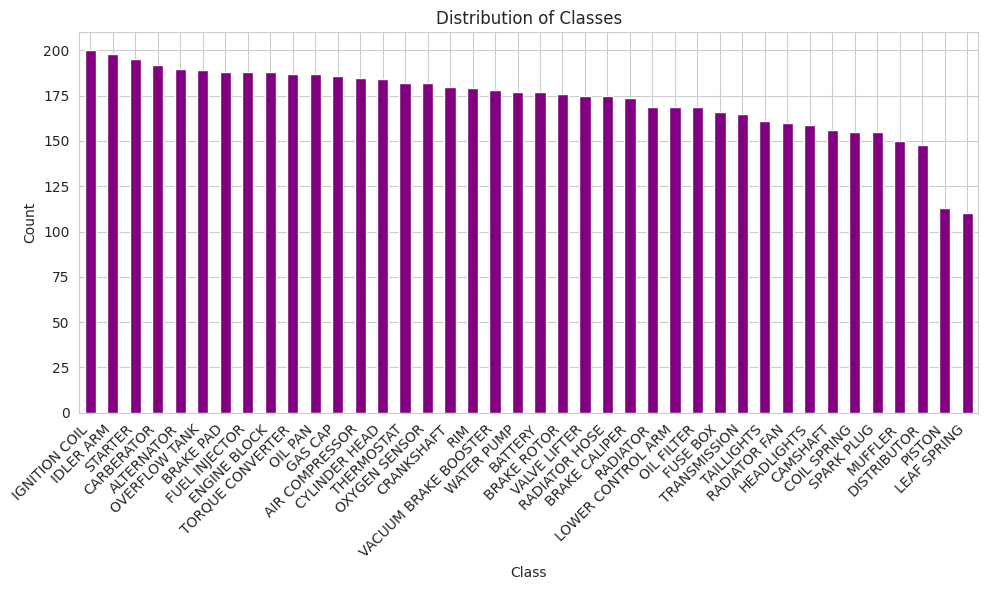

In [ ]:
plt.figure(figsize=(10, 6))
label_series.value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Feature Analysis by PCA (Principal Component Analysis)

In [ ]:
%matplotlib inline
import torch
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torchvision.utils
import numpy as np
import pandas as pd
import random
from PIL import Image
import torch
from torch.autograd import Variable
import PIL.ImageOps
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torchvision.transforms.functional as F2

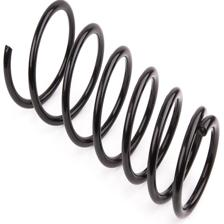

In [ ]:
img = torchvision.transforms.ToPILImage()(train_tensor_X[0])
display(img)

In [ ]:
images = []
inputs = []

for i in range(len(train_tensor_X)):
  img = train_tensor_X[i]

  img_permuted = img.permute(1, 2, 0)

  images.append(img_permuted)
  arr = np.array(img_permuted)

  # make a 1-dimensional view of arr
  flat_arr = arr.ravel()

  # convert to a matrix
  v = np.matrix(flat_arr)

  inputs.append(v)

inputs = np.squeeze(np.asarray(inputs))

In [ ]:
print(inputs.shape)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# PCA transformation and reduce the dimension from 150528 to 500
m = 500

pca = PCA(n_components=m, whiten=True)

In [ ]:
X_train_fit = pca.fit_transform(inputs) # Principal Components
Df =pd.DataFrame(data = X_train_fit)

label = pd.Series(train_tensor_y)
principalDf = pd.concat([Df, label], axis = 1, join='inner', ignore_index=True)

# column names
columns = []
for i in range(m):
  columns.append(f"principalcomponent{i+1}")
columns.append("label")

principalDf.columns = columns
print(principalDf.iloc[:,list(range(5)) + [-1]]) # first 5 CPs and label
print(X_train_fit.shape)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

# plt.figure(figsize=(8, 8))

plt.plot(range(1,m+1), (pca.explained_variance_ratio_.cumsum())*100, color='#440154')
# plt.title('Explained Variance',fontsize=15)
plt.xlabel('Number of Principle Components', fontsize=10)
plt.ylabel('% of Explained Variance ', fontsize=10)
plt.show()

In [ ]:
pca.explained_variance_ratio_.cumsum()[[99, 199, 299, 399, 499]]

In [ ]:
# convert to image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 6))

imageshape = (224, 224, 3)

for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    # Reshape the PCA component to the image shape (224, 224, 3)
    pca_component = pca.components_[i].reshape(imageshape)
    # Normalize the component to be in range [0, 1] if it's a float
    pca_component = (pca_component - pca_component.min()) / (pca_component.max() - pca_component.min())
    # Display the component as an image
    ax.imshow(pca_component, cmap=plt.cm.bone)

plt.show()